In [60]:
#importing libraries
import pandas as pd

In [61]:
# read csv file
df=pd.read_csv('train.csv')

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42100 entries, 0 to 42099
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    42100 non-null  int64  
 1   no_of_adults                          42100 non-null  int64  
 2   no_of_children                        42100 non-null  int64  
 3   no_of_weekend_nights                  42100 non-null  int64  
 4   no_of_week_nights                     42100 non-null  int64  
 5   type_of_meal_plan                     42100 non-null  int64  
 6   required_car_parking_space            42100 non-null  int64  
 7   room_type_reserved                    42100 non-null  int64  
 8   lead_time                             42100 non-null  int64  
 9   arrival_year                          42100 non-null  int64  
 10  arrival_month                         42100 non-null  int64  
 11  arrival_date   

In [63]:
# seperate inp and op

In [64]:
x=df.drop(labels=['id','booking_status'],axis=1)
y=df[['booking_status']]

In [65]:
# preprocessing

In [66]:
from sklearn.preprocessing import StandardScaler

In [67]:
ss=StandardScaler()

In [68]:
x=pd.DataFrame(ss.fit_transform(x),columns=x.columns)

In [69]:
x

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,0.151040,-0.313454,-0.998814,-0.278849,1.294624,-0.160945,-0.515173,-1.170469,0.409661,-2.330398,-0.214091,0.428551,5.766758,33.699120,-0.101479,-0.998052,-0.737691
1,0.151040,-0.313454,0.130259,-0.278849,-0.407020,-0.160945,-0.515173,0.161740,0.409661,-0.209778,1.473487,-1.149928,-0.173408,-0.060506,-0.101479,-0.870153,-0.737691
2,0.151040,-0.313454,-0.998814,-0.979466,-0.407020,-0.160945,-0.515173,2.604122,0.409661,1.557404,-1.564154,-1.149928,-0.173408,-0.060506,-0.101479,-1.415406,-0.737691
3,-1.753925,-0.313454,-0.998814,-0.278849,1.294624,-0.160945,-0.515173,-0.886758,0.409661,1.557404,-1.676659,0.428551,-0.173408,-0.060506,-0.101479,-1.307702,-0.737691
4,0.151040,-0.313454,0.130259,-1.680084,-0.407020,-0.160945,-0.515173,1.901012,0.409661,0.850531,0.010919,-1.149928,-0.173408,-0.060506,-0.101479,-0.122955,-0.737691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42095,2.056005,-0.313454,-0.998814,1.122386,-0.407020,-0.160945,0.685890,0.692156,0.409661,1.557404,1.585992,0.428551,-0.173408,-0.060506,-0.101479,0.954088,1.842849
42096,0.151040,-0.313454,-0.998814,0.421768,-0.407020,-0.160945,-0.515173,-0.862087,-2.441040,0.497095,0.798456,-1.149928,-0.173408,-0.060506,-0.101479,3.233919,-0.737691
42097,0.151040,-0.313454,-0.998814,-0.278849,2.996268,-0.160945,-0.515173,2.320411,0.409661,-0.209778,0.573445,-1.149928,-0.173408,-0.060506,-0.101479,-0.230659,-0.737691
42098,-1.753925,-0.313454,-0.998814,0.421768,-0.407020,-0.160945,-0.515173,-1.219810,0.409661,1.203968,-0.776617,-1.149928,-0.173408,-0.060506,-0.101479,0.415567,-0.737691


In [70]:
# train test split

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [73]:
xtrain.shape

(33680, 17)

In [74]:
xtest.shape

(8420, 17)

In [75]:
# build  neural network

In [76]:
from keras.models import Sequential
from keras.layers import Input,Dense,Dropout

In [77]:
# input layers
model=Sequential()
model.add(Input(shape=(xtrain.shape[1],)))

# hidden layer
model.add(Dense(units=64,activation='relu'))

# add dropout layer
model.add(Dropout(rate=0.5))

# hidden layer 2
model.add(Dense(units=32,activation='relu'))

# add dropout layer
model.add(Dropout(rate=0.4))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

In [78]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [79]:
# binary cross entropy

In [80]:
hist=model.fit(xtrain,ytrain,validation_split=0.2,epochs=60)

Epoch 1/60
842/842 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6661 - loss: 0.6026 - val_accuracy: 0.7686 - val_loss: 0.4880
Epoch 2/60
842/842 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7601 - loss: 0.4990 - val_accuracy: 0.7720 - val_loss: 0.4793
Epoch 3/60
842/842 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7718 - loss: 0.4869 - val_accuracy: 0.7755 - val_loss: 0.4767
Epoch 4/60
842/842 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7759 - loss: 0.4796 - val_accuracy: 0.7772 - val_loss: 0.4732
Epoch 5/60
842/842 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7755 - loss: 0.4827 - val_accuracy: 0.7819 - val_loss: 0.4711
Epoch 6/60
842/842 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7784 - loss: 0.4743 - val_accuracy: 0.7795 - val_loss: 0.4712
Epoch 7/60
842/842 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7809 - loss: 0.4740 - val_accuracy: 0.7821 - val_loss: 0.4676
Epoch 8/60
842/842 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7814 - loss: 0.4691 - val_accuracy: 0.

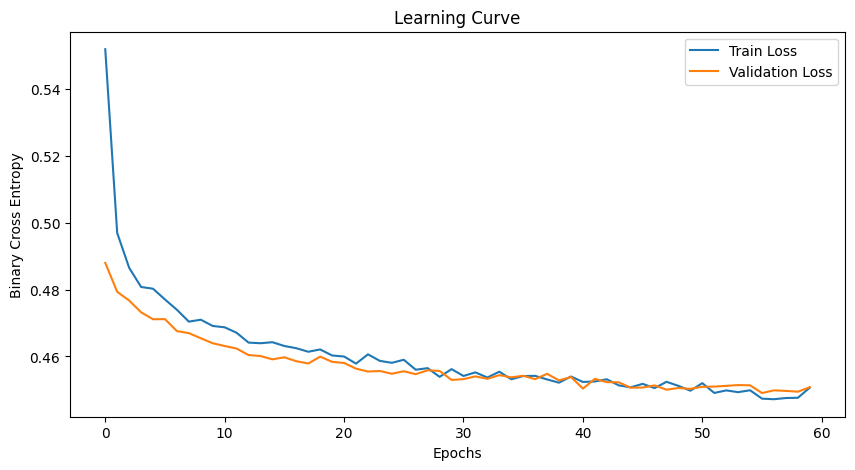

In [81]:
# plot the learning curve
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(hist.history['loss'],label='Train Loss')
plt.plot(hist.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Binary Cross Entropy')
plt.title('Learning Curve')
plt.legend()
plt.show()

In [83]:
# evaluate model
model.evaluate(xtrain,ytrain)

1053/1053 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8065 - loss: 0.4293


[0.4312173128128052, 0.8055819272994995]

In [84]:
tr_prob=model.predict(xtrain)
ts_prob=model.predict(xtest)

1053/1053 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
264/264 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [85]:
tr_prob[:5]

array([[0.00404001],
       [0.15985322],
       [0.8233828 ],
       [0.7467793 ],
       [0.8182178 ]], dtype=float32)

In [86]:
tr_pred=[]
for i in tr_prob:
  if i>=0.5:
    tr_pred.append(1)
  else:
    tr_pred.append(0)

In [87]:
ts_pred=[]
for i in ts_prob:
  if i>=0.5:
    ts_pred.append(1)
  else:
    ts_pred.append(0)

In [88]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

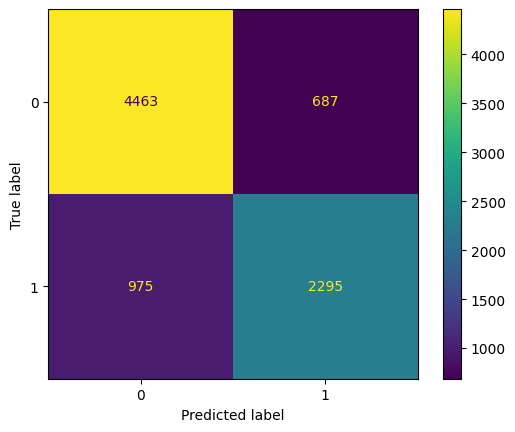

In [89]:
cf=confusion_matrix(ytest,ts_pred)
cfd=ConfusionMatrixDisplay(cf)
cfd.plot()

In [90]:
 model.save('total_booking.keras')

In [91]:
# read test csv file
df1=pd.read_csv('test.csv')

In [92]:
x1=pd.DataFrame(ss.fit_transform(df1),columns=df1.columns)

In [93]:
x1.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,-1.731989,2.061087,-0.314961,0.126652,1.149127,-0.402773,-0.1666,0.685799,0.088181,0.408978,1.559433,-1.216381,0.435667,-0.178001,-0.060829,-0.101336,0.297557,1.853010
1,-1.731866,0.160920,-0.314961,-1.011996,0.436464,-0.402773,-0.1666,-0.518770,-1.008778,-2.445121,0.853184,0.574448,-1.154075,-0.178001,-0.060829,-0.101336,-0.533552,-0.745231
2,-1.731742,0.160920,4.156621,-1.011996,-0.988861,-0.402773,-0.1666,3.094937,-1.058079,0.408978,0.146934,-0.656747,0.435667,-0.178001,-0.060829,-0.101336,3.676312,0.553890
3,-1.731619,0.160920,-0.314961,-1.011996,0.436464,-0.402773,-0.1666,-0.518770,-0.195303,0.408978,-0.912440,1.581790,-1.154075,-0.178001,-0.060829,-0.101336,-0.648983,-0.745231
4,-1.731495,-1.739248,-0.314961,-1.011996,-0.276199,3.038115,-0.1666,-0.518770,-1.193658,0.408978,0.500059,0.574448,0.435667,-0.178001,-0.060829,-0.101336,1.068913,-0.745231


In [94]:
x1=x1.drop(labels='id',axis=1)

In [95]:
prob=model.predict(x1)
prob[:5]

878/878 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.09043454],
       [0.02475373],
       [0.2946704 ],
       [0.18613681],
       [0.5445923 ]], dtype=float32)

In [96]:
preds=[]
for i in prob:
  if i>=0.5:
    preds.append(1)
  else:
    preds.append(0)

In [97]:
preds[:5]

[0, 0, 0, 0, 1]

In [98]:
x1['booking_status']=preds

In [99]:
x1['id']=df1[['id']]

In [100]:
result=x1[['id','booking_status']]

In [101]:
# predictions

In [102]:
result.head(20)

,id,booking_status
0,42100,0
1,42101,0
2,42102,0
3,42103,0
4,42104,1
5,42105,1
6,42106,1
7,42107,1
8,42108,0
9,42109,0
